# 데이터사이언스 (0010085001)

## Exercise 6: Data Understanding (1)

In this excercise, we will cover the exercise on the data understanding. We will learn how to adjust and handle missing values or strange values in the data.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import requests

%matplotlib inline


a = [[1, 2], [3, 4]]
b = [[1, 1], [1, 1]]

print(np.dot(a, b))
print(np.multiply(a, b)) # hadamard product

[[3 3]
 [7 7]]
[[1 2]
 [3 4]]


### 1. 날짜 자료형

#### 예제: html 에서 테이블 데이터 가져오기

https://pandas.pydata.org/docs/reference/api/pandas.read_html.html

In [102]:
# Step 1: 파일 읽어오기
url = 'https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'

# html에서 표 가져오기
dfs = pd.read_html(url)

In [103]:
# 데이터 프레임 길이 출력
len(dfs)

1

In [104]:
# 리스트 내의 첫 번째 원소를 다른 변수에 할당
# 첫 번째 데이터만 가져오면 데이터프레임
dfs = dfs[0]

In [105]:
# 데이터프레임의 첫 5줄 출력
dfs.head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
1,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,"March 10, 2023",10539
2,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
3,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
4,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536


In [106]:
# 데이터프레임 크기 확인
dfs.shape

(565, 7)

In [107]:
# 각 column 의 정보를 출력
# 데이터프레임의 구성 정보 확인
dfs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bank NameBank            565 non-null    object
 1   CityCity                 565 non-null    object
 2   StateSt                  565 non-null    object
 3   CertCert                 565 non-null    int64 
 4   Acquiring InstitutionAI  565 non-null    object
 5   Closing DateClosing      565 non-null    object
 6   FundFund                 565 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.0+ KB


In [108]:
# Step 2: 날짜 변경
# 문자열을 날짜형으로 변경
dfs['Closing Date'] = pd.to_datetime(dfs['Closing DateClosing']) 

In [109]:
# 데이터프레임의 첫 5줄 출력
dfs.head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund,Closing Date
0,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540,2023-03-12
1,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,"March 10, 2023",10539,2023-03-10
2,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538,2020-10-23
3,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537,2020-10-16
4,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536,2020-04-03


In [110]:
# 자료형 확인
dfs.dtypes

Bank NameBank                      object
CityCity                           object
StateSt                            object
CertCert                            int64
Acquiring InstitutionAI            object
Closing DateClosing                object
FundFund                            int64
Closing Date               datetime64[ns]
dtype: object

In [111]:
# Step 3: 날짜의 연도만 추출
# 날짜 형을 변경하거나 조작할 경우 dt 연산자 사용
dfs['Closing Date'].dt

In [112]:
# 날짜에서 year, month, day 를 새로운 column 으로 생성
dfs['Year'] = dfs['Closing Date'].dt.strftime('%Y')
dfs['Month'] = dfs['Closing Date'].dt.strftime('%m')
dfs['Day'] = dfs['Closing Date'].dt.strftime('%d')

In [113]:
# 데이터프레임의 첫 5줄 출력
dfs.head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund,Closing Date,Year,Month,Day
0,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540,2023-03-12,2023,03,12
1,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,"March 10, 2023",10539,2023-03-10,2023,03,10
2,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538,2020-10-23,2020,10,23
3,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537,2020-10-16,2020,10,16
4,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536,2020-04-03,2020,04,03


In [114]:
# Step 4: 파일로 저장하기
dfs.to_csv('failed_bank_list.csv')

In [115]:
# Step 5: 파일에서 다시 읽기
# 문자 열을 처음부터 날짜로 변환
dfs_ = pd.read_csv('failed_bank_list.csv', 
                   parse_dates=['Closing DateClosing']) 

In [116]:
# 각 row 의 정보를 출력
dfs_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               565 non-null    int64         
 1   Bank NameBank            565 non-null    object        
 2   CityCity                 565 non-null    object        
 3   StateSt                  565 non-null    object        
 4   CertCert                 565 non-null    int64         
 5   Acquiring InstitutionAI  565 non-null    object        
 6   Closing DateClosing      565 non-null    datetime64[ns]
 7   FundFund                 565 non-null    int64         
 8   Closing Date             565 non-null    object        
 9   Year                     565 non-null    int64         
 10  Month                    565 non-null    int64         
 11  Day                      565 non-null    int64         
dtypes: datetime64[ns](1), int64(6), obje

In [117]:
# 데이터프레임의 첫 5줄 출력
dfs_.head()

,Unnamed: 0,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund,Closing Date,Year,Month,Day
0,0,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,10540,2023-03-12,2023,3,12
1,1,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,2023-03-10,10539,2023-03-10,2023,3,10
2,2,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,10538,2020-10-23,2020,10,23
3,3,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,10537,2020-10-16,2020,10,16
4,4,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,10536,2020-04-03,2020,4,3


In [118]:
# 불필요한 column 제거
dfs_ = dfs_.drop('Unnamed: 0', axis=1) 
dfs_.head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund,Closing Date,Year,Month,Day
0,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,10540,2023-03-12,2023,3,12
1,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,2023-03-10,10539,2023-03-10,2023,3,10
2,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,10538,2020-10-23,2020,10,23
3,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,10537,2020-10-16,2020,10,16
4,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,10536,2020-04-03,2020,4,3


<AxesSubplot:ylabel='Frequency'>

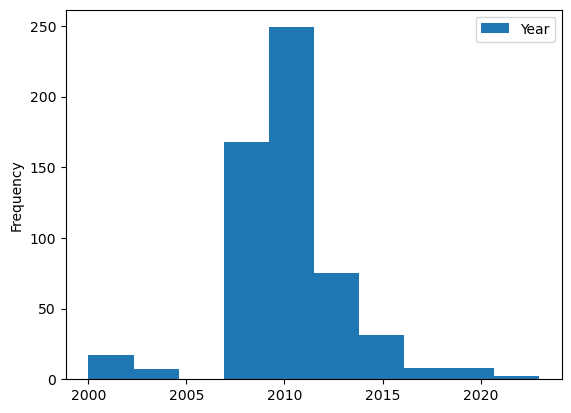

In [119]:
# 년도 열을 기준으로 히스토그램 그래프 생성
dfs_.plot(y='Year', kind='hist')

### 2. 결측치 및 이상치 값 정리

#### 예제: 구글스토어 자료로 자료형 변경

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [120]:
# Step 1: 캐글에서 데이터 받기
# url = 'https://kaggle.com/lava18/google-play-store-apps'

In [121]:
# Step 2: 파일을 읽어 데이터프레임으로 변환
gstore = pd.read_csv('googleplaystore.csv')

In [122]:
# 데이터프레임 크기 확인
gstore.shape

(10841, 13)

In [123]:
# 데이터프레임의 첫 5줄 출력
gstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [124]:
# Step 3: 열의 결측값 확인
gstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [125]:
# 모든 결측값을 0으로 처리
gstore = gstore.fillna(0)

In [126]:
# 다시 결측값을 확인
gstore.isna().sum().sum()
# gstore.isna().sum()

0

In [127]:
# Step 4: 열 자료형 확인
# 모든 자료형의 개수 확인
gstore.dtypes.value_counts() 


object     12
float64     1
dtype: int64

In [128]:
# Step 5: 날짜 자료형으로 변경
try:
  gstore['Last Updated'] = pd.to_datetime(gstore['Last Updated'])
except Exception as e:
  print(e)

day is out of range for month: 1.0.19


In [129]:
# coerce 매개변수 이용 강제로 변경
# 발생한 에러를 N/A로 변경
gstore['Last Updated'] = pd.to_datetime(gstore['Last Updated'], errors='coerce')

In [130]:
# column 확인
gstore['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [131]:
# Step 5: 숫자 자료형으로 변경
gstore['Installs'].str

In [132]:
# 숫자들 사이의 + 기호를 빈 문자열로 변환
gstore['Installs'] = gstore['Installs'].str.replace('+', '')
gstore['Installs']

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_26672/3026697931.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gstore['Installs'] = gstore['Installs'].str.replace('+', '')


0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10841, dtype: object

In [133]:
# 숫자들 사이의 쉼표를 기호를 빈 문자열로 변환
gstore['Installs'] = gstore['Installs'].str.replace(',', '')
gstore['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object

In [134]:
# 각 column 값의 발생 횟수 계산
gstore['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: Installs, dtype: int64

In [135]:
# 무료라는 의미의 Free 로 작성된 것을 0 으로 변경
gstore['Installs'] = gstore['Installs'].str.replace('Free', '0')
gstore['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: Installs, dtype: int64

In [136]:
# 변환 후 자료형 변경
gstore['Installs'] = gstore['Installs'].astype(str).astype(int)
gstore['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: int64

### 3. 다양한 값의 정규화와 변환

#### 예제: 내부 값 크기 변환

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [137]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [138]:
# Step 1: 이진화
input_data = np.arange(1, 10).reshape(3, 3)
input_data

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [139]:
# 전처리 모듈 중 바이너리로 변환하는 클래스 확인
type(preprocessing.Binarizer)

type

In [140]:
# threshold 2.1 에 대해 binarization 수행
data_bin = preprocessing.Binarizer(threshold=2.1).transform(input_data)
data_bin

array([[0, 0, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [141]:
# threshold 5.1 에 대해 binarization 수행
data_bin = preprocessing.Binarizer(threshold=5.1).transform(input_data)
data_bin

array([[0, 0, 0],
       [0, 0, 1],
       [1, 1, 1]])

In [142]:
# Step 2: 스케일링 처리
# 앞에서 정의한 배열의 평균
input_data.mean()

5.0

In [143]:
# 앞에서 정의한 열에 대한 평균
input_data.mean(axis=0)

array([4., 5., 6.])

In [144]:
# 앞에서 정의한 열에 대한 표준편차
input_data.std(axis=0)

array([2.44948974, 2.44948974, 2.44948974])

In [145]:
# 전처리 수행할 scale 함수 확인
type(preprocessing.scale)

function

In [146]:
# 데이터를 스케일링 (z = (x-평균) / 표준편차)
data = preprocessing.scale(input_data)
data

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [147]:
# axis=0 에 대해 평균 계산
data.mean(axis=0)

array([0., 0., 0.])

In [148]:
# axis=0 에 대해 표준편차 계산
data.std(axis=0)

array([1., 1., 1.])

In [149]:
# Step 3: 최솟값과 최댓값 조정 ~ normalize
# x_i^' = (x_i - min(x)) / (max(x) - min(x))
# 8bit -> 0~255
min = np.min(input_data)
max = np.max(input_data)
input_data2 = (input_data - min) / (max - min) # [0, 1]
input_data2

array([[0.   , 0.125, 0.25 ],
       [0.375, 0.5  , 0.625],
       [0.75 , 0.875, 1.   ]])

In [150]:
# 주어진 범위 (0, 1)로 스케일링
print(input_data)
data_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(input_data)
data_minmax

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])

In [151]:
# 주어진 범위 (0, 3)로 스케일링
data_minmax = preprocessing.MinMaxScaler(feature_range=(0, 3)).fit_transform(input_data)
data_minmax

array([[0. , 0. , 0. ],
       [1.5, 1.5, 1.5],
       [3. , 3. , 3. ]])

In [152]:
# Step 4: 표준화처리

In [153]:
# 정규화 (z = x - u / s)
# 평균 0, 분산 1을 갖도록 스케일 조정
data_standard_ = preprocessing.StandardScaler().fit_transform(input_data) 
data_standard_

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [154]:
# 정규화된 데이터의 평균 계산
data_standard_.mean() # 

2.4671622769447922e-17

In [155]:
# 정규화된 데이터의 표준편차 계산
data_standard_.std()

1.0

In [156]:
# Step 4: 정규화 처리 
# 주어진 norm  (L1)으로 정규화
data_normal_l1 = preprocessing.normalize(input_data, norm='l1')
data_normal_l1


array([[0.16666667, 0.33333333, 0.5       ],
       [0.26666667, 0.33333333, 0.4       ],
       [0.29166667, 0.33333333, 0.375     ]])

In [157]:
# 주어진 norm  (L2)으로 정규화
data_normal_l2 = preprocessing.normalize(input_data, norm='l2')
data_normal_l2

array([[0.26726124, 0.53452248, 0.80178373],
       [0.45584231, 0.56980288, 0.68376346],
       [0.50257071, 0.57436653, 0.64616234]])